In [7]:
# import numpy as np
import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np

# Definition du substrat
x = 100
y = 50
grid = domain.create_grid(x,y)     # [hauteur, largeur]

liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
liste_deltamu = np.linspace(-1.0, 1.0, 11)

nb_pas_temps = 10
gif = False

kT = liste_kT[2]
deltamu = liste_deltamu[0]

nb_iterations=1

# interpreter.gamma_dt(parametres[0], (x,y), kT, deltamu)
# interpreter.rugosite_dt(nb_pas_temps, parametres[1], (x,y), kT[0], deltamu[0])


# interpreter.plot_growth_2d(grid, show=True)

In [8]:
liste_moy_gamma_kbt=[]
liste_moy_rugosite_kbt=[]
liste_std_gamma_kbt=[]
liste_std_rugosite_kbt=[]
for param_kbT in liste_kT:
    print(param_kbT)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, deltamu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_gamma)

    liste_moy_gamma_kbt.append(gamma_moy_param)
    liste_moy_rugosite_kbt.append(rugosite_moy_param)

    liste_std_gamma_kbt.append(gamma_std_param)
    liste_std_rugosite_kbt.append(rugosite_std_param)



0.5
L'événement est une adsorption au site 28
L'événement est une adsorption au site 79
L'événement est une adsorption au site 89
L'événement est une désorption au site 13
L'événement est une désorption au site 29
L'événement est une désorption au site 89
L'événement est une désorption au site 79
L'événement est une adsorption au site 12
L'événement est une désorption au site 29
L'événement est une adsorption au site 44
0.75
L'événement est une adsorption au site 80
L'événement est une adsorption au site 38
L'événement est une désorption au site 3
L'événement est une désorption au site 31
L'événement est une désorption au site 60
L'événement est une désorption au site 89
L'événement est une adsorption au site 96
L'événement est une désorption au site 30
L'événement est une désorption au site 6
L'événement est une désorption au site 61
1.0
L'événement est une adsorption au site 44
L'événement est une adsorption au site 31
L'événement est une désorption au site 14
L'événement est une dés

In [9]:
liste_gamma_moy_mu=[]
liste_rugosite_moy_mu=[]
liste_gamma_std_mu=[]
liste_rugosite_std_mu=[]
for param_mu in liste_deltamu:
    print(param_mu)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_gamma)

    liste_gamma_moy_mu.append(gamma_moy_param)
    liste_rugosite_moy_mu.append(rugosite_moy_param)

    liste_gamma_std_mu.append(gamma_std_param)
    liste_rugosite_std_mu.append(rugosite_std_param)

-1.0
L'événement est une adsorption au site 75
L'événement est une adsorption au site 16
L'événement est une adsorption au site 12
L'événement est une adsorption au site 94
L'événement est une désorption au site 16
L'événement est une adsorption au site 56
L'événement est une désorption au site 85
L'événement est une désorption au site 30
L'événement est une désorption au site 88
L'événement est une désorption au site 87
-0.8
L'événement est une désorption au site 6
L'événement est une adsorption au site 32
L'événement est une adsorption au site 51
L'événement est une désorption au site 19
L'événement est une désorption au site 11
L'événement est une désorption au site 51
L'événement est une désorption au site 89
L'événement est une adsorption au site 4
L'événement est une désorption au site 24
L'événement est une adsorption au site 46
-0.6
L'événement est une adsorption au site 20
L'événement est une désorption au site 91
L'événement est une adsorption au site 92
L'événement est une a

C:\Users\laure\AppData\Local\Temp\ipykernel_15264\1153471764.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


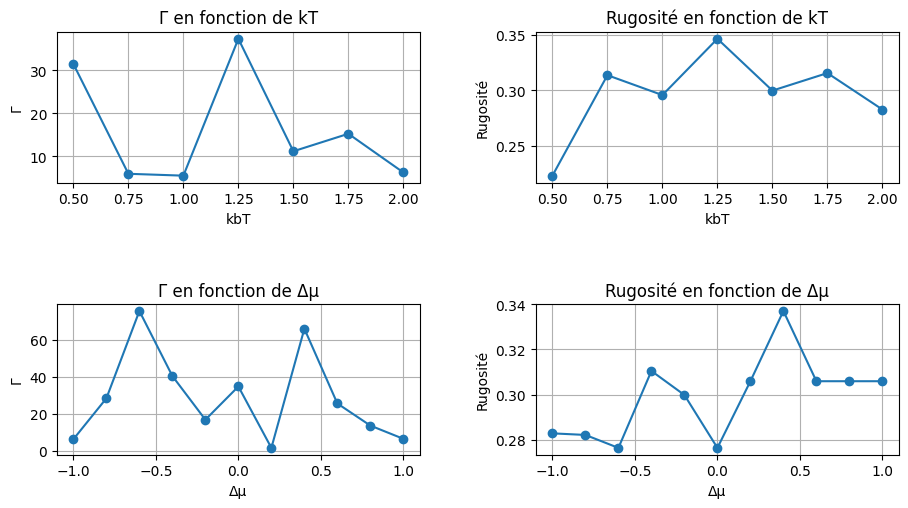

In [10]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
ax[0][0].errorbar(liste_kT,liste_moy_gamma_kbt,liste_std_gamma_kbt,fmt='o')
ax[0][0].plot(liste_kT,liste_moy_gamma_kbt,color='#1f77b4')
ax[0][0].grid()
ax[0][0].set_xlabel('kbT')
ax[0][0].set_ylabel('Γ')
ax[0][0].set_title("Γ en fonction de kT")

ax[0][1].errorbar(liste_kT,liste_moy_rugosite_kbt,liste_std_rugosite_kbt,fmt='o')
ax[0][1].plot(liste_kT,liste_moy_rugosite_kbt,color='#1f77b4')
ax[0][1].grid()
ax[0][1].set_xlabel('kbT')
ax[0][1].set_ylabel('Rugosité')
ax[0][1].set_title("Rugosité en fonction de kT")

ax[1][0].errorbar(liste_deltamu,liste_gamma_moy_mu,liste_gamma_std_mu,fmt='o')
ax[1][0].plot(liste_deltamu,liste_gamma_moy_mu,color='#1f77b4')
ax[1][0].grid()
ax[1][0].set_xlabel('Δμ')
ax[1][0].set_ylabel('Γ')
ax[1][0].set_title("Γ en fonction de Δμ")

ax[1][1].errorbar(liste_deltamu,liste_rugosite_moy_mu,liste_rugosite_std_mu,fmt='o')
ax[1][1].plot(liste_deltamu,liste_rugosite_moy_mu,color='#1f77b4')
ax[1][1].grid()
ax[1][1].set_xlabel('Δμ')
ax[1][1].set_ylabel('Rugosité')
ax[1][1].set_title("Rugosité en fonction de Δμ")
fig.tight_layout(pad=4.0) 
fig.show()

In [14]:
KMC2D(grid,liste_kT[-1],liste_deltamu[-1],15,True,False,False)

L'événement est une désorption au site 88
L'événement est une adsorption au site 45
L'événement est une adsorption au site 67
L'événement est une adsorption au site 0
L'événement est une adsorption au site 86
L'événement est une adsorption au site 12
L'événement est une adsorption au site 66
L'événement est une désorption au site 55
L'événement est une adsorption au site 0
L'événement est une adsorption au site 16
L'événement est une adsorption au site 79
L'événement est une adsorption au site 53
L'événement est une désorption au site 74
L'événement est une adsorption au site 8
L'événement est une adsorption au site 56


(array([[1, 0, None, ..., None, None, None],
        [0, None, None, ..., None, None, None],
        [1, None, None, ..., None, None, None],
        ...,
        [None, None, None, ..., None, None, None],
        [1, 0, None, ..., None, None, None],
        [None, None, None, ..., None, None, None]], dtype=object),
 0.08373033459618541,
 [])